In [1]:
from qiskit import *
%matplotlib inline 
from qiskit.tools.visualization import plot_histogram

In [12]:
secretnumber='101010' # el numero a adivinar el binario

In [13]:
circuit=QuantumCircuit(len(secretnumber)+1,len(secretnumber)) # 6 bits clasicos 7 cuanticos
#circuit.h([0,1,2,3,4,5]) ahora generalizacion
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()
#generalizacion
for ii,yesno in enumerate(reversed(secretnumber)):
    if yesno=='1':
        circuit.cx(ii,len(secretnumber))
#circuit.cx(5,6)# aqui estoy armando el numero
#circuit.cx(3,6)
#circuit.cx(0,6)
#circuit.barrier()
for i in range(len(secretnumber)):
    circuit.h(i)
circuit.barrier()
circuit.measure(range(len(secretnumber)),range(len(secretnumber)))

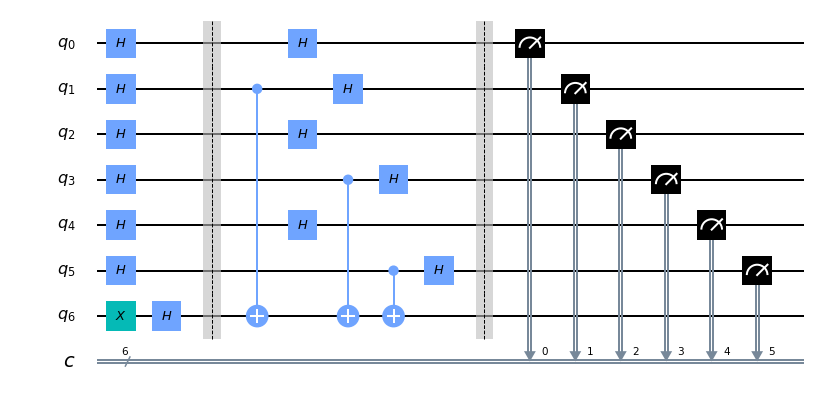

In [14]:
circuit.draw(output='mpl')

In [15]:
simulator=Aer.get_backend('qasm_simulator')
result=execute(circuit,backend=simulator,shots=1).result()
counts=result.get_counts()
print(counts)

{'101010': 1}
